## Lab 3 Covid Tweet
## Jiahang Wu and Qihao Yun


In [5]:
import pandas as pd
import numpy as np
import time

## Pt 1 Setup
## Q1

In [6]:
import re

In [24]:
#data = pd.read_csv('us_tweets_sample.csv')
tweets_us_df = pd.read_csv('us_tweets_sample.csv')

In [25]:
us_states = pd.read_excel('us_states.xlsx')

In [26]:
#start Timer
start_time = time.time()

In [27]:
#Drop duplicates
#'status_id'
tweets_us_df.drop_duplicates(subset='status_id')

#select 500k random tweets
tweets_us_df = tweets_us_df.sample(n=500000, random_state=42)

#remove redundant col
tweets_us_df = tweets_us_df.drop(columns='Unnamed: 0')

In [28]:
#convert relevant columns to lower case
tweets_us_df['location'] = tweets_us_df['location'].apply(lambda x: x.lower())
tweets_us_df['state'] = tweets_us_df['state'].apply(lambda x: x.lower())
us_states['state'] = us_states['state'].apply(lambda x: x.lower())
us_states['region'] = us_states['region'].apply(lambda x: x.lower())

In [29]:
count_of_state_in_location_col = []
all_states = us_states['state'].tolist()
all_states

#takes a cell from table
def count_state(x):
    count = 0
    x = str(x).strip().split(' ')

    #for every token, remove all non alphabetic
    for i in range(len(x)):
        x[i] = re.sub(r"[^a-zA-Z]", "", x[i])
    
    state_found = ''  # init, to handle NYC,NY situation

    #scan single token state name
    for i in x:
        if(i in all_states): 
            if(state_found == ''):
                    state_found = i
                    count += 1
            elif(i == state_found):
                pass
    

    #if none found, try double token names
    if(count == 0):
        #for every token
        for i in range(len(x)):
            #scan this and the one before
            try:
                text = x[i-1] + ' ' + x[i]
                if(text in all_states):
                    if(state_found == ''): 
                        state_found = text
                        count += 1
                    elif(text == state_found):
                        pass
            except:
                pass
    return count

tweets_us_df['count'] = tweets_us_df['location'].apply(
    lambda x: count_state(x))


In [30]:
#examine excluded rows, dont run

temp = tweets_us_df[tweets_us_df['count'] != 1]
temp[['location','state']]
[temp['location'].tolist, temp['state'].tolist]
temp['location'].tolist

# for i in temp['location'].tolist():
#     print(i)

#mostly tweets from the same few users; 
# there are a few that are actually single state but too 
# much effort to handle them individually

#good enough


<bound method IndexOpsMixin.tolist of 1569707               new jersey/new york
1552175                oh(cleveland,oh)io
321231             hawaii(lost in a echo)
511250      wilmington  north.  carolina.
497777                new york/new jersey
                        ...              
56376      63 york st. new haven, ct 0651
1386072               new york/new jersey
446162              new forest, hampshire
998691                york, new brunswick
100820             montrose. dakota south
Name: location, Length: 180, dtype: object>

In [31]:
#new df only include 
tweets_us_df = tweets_us_df[tweets_us_df['count'] == 1]

elapsed_time = time.time() - start_time
elapsed_time

#8.718 second, excluding loading dataset


In [35]:
tweets_us_df.shape
1.0 - 499820/500000

#from 2000k, selected 500k
#shaved off 0.03% tweets that have multiple locations 


0.00036000000000002697

## Q2

In [ ]:
df2 = tweets_us_df.copy()

In [39]:
df2 = df2.drop(columns='count')

In [85]:
#start Timer
start_time = time.time()

In [86]:
#add day
df2['day'] = df2['created_at'].apply(
    lambda x: list(x.split(' '))[0])


In [87]:
#reclycing method
def extract_state(x):
    count = 0
    x = str(x).strip().split(' ')

    #for every token, remove all non alphabetic
    for i in range(len(x)):
        x[i] = re.sub(r"[^a-zA-Z]", "", x[i])
    
    state_found = ''  # init, to handle NYC,NY situation

    #scan single token state name
    for i in x:
        if(i in all_states): 
            if(state_found == ''):
                    state_found = i
                    count += 1
            elif(i == state_found):
                pass
    

    #if none found, try double token names
    if(count == 0):
        #for every token
        for i in range(len(x)):
            #scan this and the one before
            try:
                text = x[i-1] + ' ' + x[i]
                if(text in all_states):
                    if(state_found == ''): 
                        state_found = text
                        count += 1
                    elif(text == state_found):
                        pass
            except:
                pass
    
    # region = us_states[us_states['state'] == state_found]['region']
    # region = region.iloc[0]
    region = state_region.get(state_found)
    
    return state_found


def extract_region(x):
    count = 0
    x = str(x).strip().split(' ')

    #for every token, remove all non alphabetic
    for i in range(len(x)):
        x[i] = re.sub(r"[^a-zA-Z]", "", x[i])

    state_found = ''  # init, to handle NYC,NY situation

    #scan single token state name
    for i in x:
        if(i in all_states):
            if(state_found == ''):
                state_found = i
                count += 1
            elif(i == state_found):
                pass

    #if none found, try double token names
    if(count == 0):
        #for every token
        for i in range(len(x)):
            #scan this and the one before
            try:
                text = x[i-1] + ' ' + x[i]
                if(text in all_states):
                    if(state_found == ''):
                        state_found = text
                        count += 1
                    elif(text == state_found):
                        pass
            except:
                pass

    # region = us_states[us_states['state'] == state_found]['region']
    # region = region.iloc[0]
    region = state_region.get(state_found)

    return str(region)

#build a dict to improve cost
state_region = {}
for state in us_states['state'].tolist():
    region = us_states[us_states['state'] == state]['region']
    state_region[state] = (region.tolist())[0]



In [88]:
df2['state'] = df2['location'].apply(
    lambda x: extract_state(x))


In [89]:
df2['region'] = df2['location'].apply(
    lambda x: extract_region(x))


In [90]:
elapsed_time = time.time() - start_time
elapsed_time

#elapsed 12.85 sec

12.850919723510742

In [108]:
tweets_us_df = df2.copy() #apply prev changes

## Pt 2
## Q3

In [3]:
import sys
#!{sys.executable} -m pip install emoji
import nltk
import emoji
import string
#nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords = stopwords.words('english')


In [20]:
def tweet_cleaner(text):
    text = text.split(' ')
    clean_tweets = []
    #clean_tweet = ''
    
    for tweet in text:
        # 1) Convert the tweet to lowercase.
        tweet = str(tweet).lower()
        #tweet = tweet.lower()

        # 2) Remove the first two characters from the tweet (which is ‘b) – if you see it.
        tweet = re.sub("‘b","",tweet)
        
        # 3) Remove all hashtags (all the words that start with ‘#’).
        tweet = re.sub("@[A-Za-z0-9]+","",tweet)
        tweet = re.sub("#[A-Za-z0-9]+","",tweet)
        
        # 4) Remove punctuation from the tweet

        tweet = re.sub(r"[^a-zA-Z]", "", tweet)
        #tweet = tweet.translate(str.maketrans('', '', string.punctuation))       
        
        # 5) Remove stop words from the tweet2
        # (Describe what stop words are in your comments
        # and your report).
        tweet = ' '.join([word for word in tweet.split() if word not in stopwords])

        #Stop words are words that are considered unimportant to the meaning of a text. 
        #These words may seem important to us, humans, but to machine these words may be considered nuisance to the processing steps.

        # 6) Delete all words that are 3 letters long or shorter.
        tweet = re.sub(r'\b\w{1,3}\b', '', tweet)

        # 7) Remove all links (all the words for which the first four letters are ‘http’).
        tweet = re.sub(r"http\S+", "", tweet)
        
        # 8) Remove all emojis (all the words that contain ‘\\’).
        emoj = re.compile("["
            u"\U0001F600-\U0001F64F"  # emoticons
            u"\U0001F300-\U0001F5FF"  # symbols & pictographs
            u"\U0001F680-\U0001F6FF"  # transport & map symbols
            u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
            u"\U00002500-\U00002BEF"  # chinese char
            u"\U00002702-\U000027B0"
            u"\U00002702-\U000027B0"
            u"\U000024C2-\U0001F251"
            u"\U0001f926-\U0001f937"
            u"\U00010000-\U0010ffff"
            u"\u2640-\u2642" 
            u"\u2600-\u2B55"
            u"\u200d"
            u"\u23cf"
            u"\u23e9"
            u"\u231a"
            u"\ufe0f"  # dingbats
            u"\u3030"
                          "]+", re.UNICODE)
        tweet = re.sub(emoj, '', tweet)
        
        clean_tweets.append(tweet)
        
    clean_tweets = ' '.join(clean_tweets)
    
    return clean_tweets

#     df.to_csv('') #Specify location



## Q4 (apply clean + lemmatize)

In [ ]:
#import nltk
# nltk.download('punkt')
# nltk.download('averaged_perceptron_tagger')
# nltk.download('wordnet')

In [1]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet

In [2]:
lemmatizer = WordNetLemmatizer()

##Tags the words in the tweets
def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return(wordnet.ADJ)
    elif nltk_tag.startswith('V'):
        return(wordnet.VERB)
    elif nltk_tag.startswith('N'):
        return(wordnet.NOUN)
    elif nltk_tag.startswith('R'):
        return(wordnet.ADV)
    else:          
        return(None)

##Lemmatizes the words in tweets and returns the cleaned and lemmatized tweet
def lemmatize_tweet(tweet):
    #tokenize the tweet and find the POS tag for each token
    
    #tweet = tweet_cleaner(tweet) #tweet_cleaner() will be the function you will write
    
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(str(tweet))) 
    #tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatized_tweet = []
    for word, tag in wordnet_tagged:
        if tag is None:
            #if there is no available tag, append the token as is
            lemmatized_tweet.append(word)
        else:        
            #else use the tag to lemmatize the token
            lemmatized_tweet.append(lemmatizer.lemmatize(word, tag))
    return(" ".join(lemmatized_tweet))



In [128]:
#test df
df3 = tweets_us_df.sample(n=5, random_state=42)

In [140]:
def clean_and_lemmatize(x):
    x = tweet_cleaner(x)
    x = lemmatize_tweet(x)
    
    return x


In [143]:
Q4_start_time = time.time()

#df3['text_clean'] = df3['text'].apply(lambda x: clean_and_lemmatize(x))
tweets_us_df['text_clean'] = tweets_us_df['text'].apply(
    lambda x: clean_and_lemmatize(x))

Q4_elapsed_time = time.time() - Q4_start_time
Q4_elapsed_time

#took 1553.2397 sec


1553.239752292633

In [139]:
df3['text_clean']


1639336    lockdown mistakeits valid question good point ...
642599     chris christieka conway last doozy desperate r...
1531087    wendi open twitter first tweet condolence fami...
1419321    heartbreaking talk teenager friends go hallowe...
268403                                           thank great
Name: text_clean, dtype: object

In [144]:
#tweets_us_df.to_pickle('./q4_pickle')
#preserve result so far which would need 30min to run again

## Q5

In [7]:
# 1) Import the topic dictionaries. You can call the files topic_name_df (e.g. isolation_df etc.).
disinfectant_df = pd.read_excel('disinfectant_words.xlsx')
isolation_df = pd.read_excel('isolation_words.xlsx')
medicine_df = pd.read_excel('medicine_words.xlsx')
vaccine_df = pd.read_excel('vaccine_words.xlsx')

# 2) Convert the words in topic lists into lowercase.
disinfectant_df['words'] = disinfectant_df['words'].str.lower()
isolation_df['words'] = isolation_df['words'].str.lower()
medicine_df['words'] = medicine_df['words'].str.lower()
vaccine_df['words'] = vaccine_df['words'].str.lower()

In [9]:
start_time = time.time()

# 3) Tag and lemmatize the words in topic lists.
disinfectant_df['words'] = lemmatize_tweet(' '.join(
    disinfectant_df['words'].tolist()))
isolation_df['words'] = lemmatize_tweet(' '.join(
    isolation_df['words'].tolist()))
medicine_df['words'] = lemmatize_tweet(' '.join(
    medicine_df['words'].tolist()))
vaccine_df['words'] = lemmatize_tweet(' '.join(
    vaccine_df['words'].tolist()))

elapsed_time = time.time() - start_time
elapsed_time
#2.6356


2.6356282234191895

In [10]:
# 4) Take a look at the cosine_similarity.py file provided in the assignment folder.
import math
import re
from collections import Counter

WORD = re.compile(r"\w+")


def get_cosine(vec1, vec2):
    intersection = set(vec1.keys()) & set(vec2.keys())
    numerator = sum([vec1[x] * vec2[x] for x in intersection])

    sum1 = sum([vec1[x] ** 2 for x in list(vec1.keys())])
    sum2 = sum([vec2[x] ** 2 for x in list(vec2.keys())])
    denominator = math.sqrt(sum1) * math.sqrt(sum2)

    if not denominator:
        return 0.0
    else:
        return float(numerator) / denominator


def text_to_vector(text):
    words = WORD.findall(text)
    return Counter(words)
    
##Example
##cosine_score = get_cosine(text_to_vector(clean_tweet), text_to_vector(" ".join(topic_words)))
##topic_words is a list of words; clean_tweet is a string

In [26]:
q4_pickled = pd.read_pickle('./q4_pickle')


In [57]:
#tweets_us_df = q4_pickled.sample(n=100, random_state=42)
tweets_us_df = q4_pickled


In [58]:
Q5_start_time = time.time()

# 5) Calculate the cosine similarity scores for each topic by iterating through the text_clean
# column and the topic dictionaries (you should calculate cosine similarities by using one
# tweet and the topic words in dictionaries).

#tweets_us_df.loc[1639336]

disinfectant_vec = text_to_vector(" ".join(disinfectant_df['words']))
isolation_vec = text_to_vector(" ".join(isolation_df['words']))
medicine_vec = text_to_vector(" ".join(medicine_df['words']))
vaccine_vec = text_to_vector(" ".join(vaccine_df['words']))

def get_score(text,topic_vector):
    text = text_to_vector(text)
    score = get_cosine(text,topic_vector)

    return score

In [59]:
# 6) Save the results for cosine similarity scores in four different columns: disinfectant_cosine,
# isolation_cosine, medicine_cosine, vaccine_cosine.

tweets_us_df['disinfectant_cosine'] = tweets_us_df['text_clean'].apply(
    lambda x: get_score(x, disinfectant_vec))
tweets_us_df['isolation_cosine'] = tweets_us_df['text_clean'].apply(
    lambda x: get_score(x, isolation_vec))
tweets_us_df['medicine_cosine'] = tweets_us_df['text_clean'].apply(
    lambda x: get_score(x, medicine_vec))
tweets_us_df['vaccine_cosine'] = tweets_us_df['text_clean'].apply(
    lambda x: get_score(x, vaccine_vec))

#this works


In [60]:
# 7) normalize the cosine similarity
# scores to a range of 0-1 (the lowest cosine similarity score in your dataset should be equal
# to 0, and the highest cosine similarity score should be equal to 1).

disinfectant_cosine = np.asarray(tweets_us_df['disinfectant_cosine'].tolist())
isolation_cosine = np.asarray(tweets_us_df['isolation_cosine'].tolist())
medicine_cosine = np.asarray(tweets_us_df['medicine_cosine'].tolist())
vaccine_cosine = np.asarray(tweets_us_df['vaccine_cosine'].tolist())

def normalize_self(arr):
    norm = (arr - arr.min())/(arr.max() - arr.min())
    return norm


disinfectant_cosine_normal = normalize_self(disinfectant_cosine)
isolation_cosine_normal = normalize_self(isolation_cosine)
medicine_cosine_normal = normalize_self(medicine_cosine)
vaccine_cosine_normal = normalize_self(vaccine_cosine)


In [61]:
# # 8) Save the normalized scores in four new columns: disinfectant_cosine_normal,
# # isolation_cosine_normal, medicine_cosine_normal, vaccine_cosine_normal.

tweets_us_df['disinfectant_cosine_normal'] = disinfectant_cosine_normal
tweets_us_df['isolation_cosine_normal'] = isolation_cosine_normal
tweets_us_df['medicine_cosine_normal'] = medicine_cosine_normal
tweets_us_df['vaccine_cosine_normal'] = vaccine_cosine_normal

elapsed_time = time.time() - Q5_start_time
elapsed_time

#318.6927


318.6927607059479

In [63]:
tweets_us_df.to_pickle('./q5_pickle')


## Q6

In [64]:
#Q6 code sphagetti
# no it's just repeat the same process for three 
Q6_start_time = time.time()

day = tweets_us_df['day'].tolist()
df_day = pd.DataFrame([day,tweets_us_df['disinfectant_cosine_normal'].tolist(),tweets_us_df['isolation_cosine_normal'].tolist(),tweets_us_df['medicine_cosine_normal'].tolist(),tweets_us_df['vaccine_cosine_normal'].tolist()]).transpose()
df_day.columns = ['day','disinfectant_cosine_normal','isolation_cosine_normal','medicine_cosine_normal','vaccine_cosine_normal']
df_day['disinfectant_cosine_normal'] = df_day['disinfectant_cosine_normal'].astype(float)
df_day['isolation_cosine_normal'] = df_day['isolation_cosine_normal'].astype(float)
df_day['medicine_cosine_normal'] = df_day['medicine_cosine_normal'].astype(float)
df_day['vaccine_cosine_normal'] = df_day['vaccine_cosine_normal'].astype(float)
day_topic_score_df = df_day.groupby(['day']).mean()

state = tweets_us_df['state'].tolist()
df_state = pd.DataFrame([state,tweets_us_df['disinfectant_cosine_normal'].tolist(),tweets_us_df['isolation_cosine_normal'].tolist(),tweets_us_df['medicine_cosine_normal'].tolist(),tweets_us_df['vaccine_cosine_normal'].tolist()]).transpose()
df_state.columns = ['state','disinfectant_cosine_normal','isolation_cosine_normal','medicine_cosine_normal','vaccine_cosine_normal']
df_state['disinfectant_cosine_normal'] = df_state['disinfectant_cosine_normal'].astype(float)
df_state['isolation_cosine_normal'] = df_state['isolation_cosine_normal'].astype(float)
df_state['medicine_cosine_normal'] = df_state['medicine_cosine_normal'].astype(float)
df_state['vaccine_cosine_normal'] = df_state['vaccine_cosine_normal'].astype(float)
state_topic_score_df = df_state.groupby(['state']).mean()

region = tweets_us_df['region'].tolist()
df_region = pd.DataFrame([region,tweets_us_df['disinfectant_cosine_normal'].tolist(),tweets_us_df['isolation_cosine_normal'].tolist(),tweets_us_df['medicine_cosine_normal'].tolist(),tweets_us_df['vaccine_cosine_normal'].tolist()]).transpose()
df_region.columns = ['region','disinfectant_cosine_normal','isolation_cosine_normal','medicine_cosine_normal','vaccine_cosine_normal']
df_region['disinfectant_cosine_normal'] = df_region['disinfectant_cosine_normal'].astype(float)
df_region['isolation_cosine_normal'] = df_region['isolation_cosine_normal'].astype(float)
df_region['medicine_cosine_normal'] = df_region['medicine_cosine_normal'].astype(float)
df_region['vaccine_cosine_normal'] = df_region['vaccine_cosine_normal'].astype(float)
region_topic_score_df = df_region.groupby(['region']).mean()

state_topic_score_df.to_csv('./state_topic_score_df.csv')
region_topic_score_df.to_csv('./region_topic_score_df.csv')

Q6_elapsed_time = time.time() - Q6_start_time
#118.7140


In [ ]:
state_topic_score_df


In [156]:
pd.set_option("display.max_rows", 20)
print(day_topic_score_df)
#some time variaton 

            disinfectant_cosine_normal  isolation_cosine_normal  \
day                                                               
2020-04-17                    0.010326                 0.004084   
2020-04-18                    0.007348                 0.004441   
2020-04-19                    0.005437                 0.002866   
2020-04-20                    0.006520                 0.003624   
2020-04-21                    0.006036                 0.004117   
...                                ...                      ...   
2020-12-06                    0.007569                 0.003898   
2020-12-07                    0.005141                 0.004304   
2020-12-08                    0.004835                 0.004351   
2020-12-09                    0.011848                 0.003548   
2020-12-10                    0.005357                 0.002645   

            medicine_cosine_normal  vaccine_cosine_normal  
day                                                        
2020-04-

In [ ]:
#q4_pickled = pd.read_pickle('./q4_pickle')


## Pt V
## Q7 Clustering

In [70]:
import sklearn
from sklearn.cluster import KMeans


In [101]:
data = pd.read_csv('./state_topic_score_df.csv',index_col='state')

In [102]:
#Kmeans clustering 
kmeans = KMeans(n_clusters=4, init='k-means++')
kmeans.fit(data)
labels = kmeans.labels_


In [97]:
#add to labels to df by excel
temp_df = pd.DataFrame({'labels': labels})
temp_df.to_csv('./lables.csv')

In [ ]:
#descriptive stat of the clusters
data_kmeans = pd.read_csv('./state_topic_score_df_mod.csv', index_col='state')
print(data_kmeans[data_kmeans['labels'] == 0].describe())
print(data_kmeans[data_kmeans['labels'] == 1].describe())
print(data_kmeans[data_kmeans['labels'] == 2].describe())
print(data_kmeans[data_kmeans['labels'] == 3].describe())

#data[data['labels']]


In [123]:
#cluster members 
g1 = data_kmeans[data_kmeans['labels'] == 0]
print(g1.index)
g1 = data_kmeans[data_kmeans['labels'] == 1]
print(g1.index)
g1 = data_kmeans[data_kmeans['labels'] == 2]
print(g1.index)
g1 = data_kmeans[data_kmeans['labels'] == 3]
print(g1.index)

#no substantial difference across groups and do not break along geographical lines

Index(['arkansas', 'california', 'florida', 'hawaii', 'iowa', 'louisiana',
       'maine', 'minnesota', 'nebraska', 'nevada', 'new hampshire',
       'north carolina', 'south carolina', 'utah', 'wisconsin', 'wyoming'],
      dtype='object', name='state')
Index(['alaska', 'delaware', 'mississippi', 'new mexico', 'new york',
       'north dakota', 'washington'],
      dtype='object', name='state')
Index(['alabama', 'arizona', 'colorado', 'georgia', 'illinois', 'indiana',
       'kansas', 'kentucky', 'massachusetts', 'michigan', 'missouri',
       'montana', 'new jersey', 'ohio', 'oklahoma', 'oregon', 'pennsylvania',
       'rhode island', 'south dakota', 'tennessee', 'vermont', 'virginia'],
      dtype='object', name='state')
Index(['connecticut', 'idaho', 'maryland', 'texas'], dtype='object', name='state')


In [125]:
from sklearn.cluster import SpectralClustering


In [129]:
#repeat process with spectral clsutering
data = pd.read_csv('./state_topic_score_df.csv', index_col='state')

clustering = SpectralClustering(n_clusters=4,
    assign_labels='discretize',random_state=0).fit(data)

clustering.labels_

temp_df = pd.DataFrame({'labels': clustering.labels_})
temp_df.to_csv('./lables_spectral.csv')


In [ ]:
data_spectral = pd.read_csv('./state_topic_score_df_spec.csv', index_col='state')

print(data_spectral[data_spectral['labels'] == 0].describe())
print(data_spectral[data_spectral['labels'] == 1].describe())
print(data_spectral[data_spectral['labels'] == 2].describe())
print(data_spectral[data_spectral['labels'] == 3].describe())


In [131]:
g1 = data_spectral[data_spectral['labels'] == 0]
print(g1.index)
g1 = data_spectral[data_spectral['labels'] == 1]
print(g1.index)
g1 = data_spectral[data_spectral['labels'] == 2]
print(g1.index)
g1 = data_spectral[data_spectral['labels'] == 3]
print(g1.index)

#similar behavior as kmeans, as far as geography is concerned


Index(['alaska', 'connecticut', 'delaware', 'illinois', 'kansas',
       'mississippi', 'new mexico', 'new york', 'north dakota', 'washington'],
      dtype='object', name='state')
Index(['arkansas', 'colorado', 'hawaii', 'idaho', 'iowa', 'maryland',
       'minnesota', 'nebraska', 'new jersey', 'oklahoma', 'oregon',
       'pennsylvania', 'rhode island', 'south dakota'],
      dtype='object', name='state')
Index(['alabama', 'georgia', 'indiana', 'kentucky', 'massachusetts',
       'michigan', 'missouri', 'montana', 'ohio', 'tennessee', 'texas',
       'vermont', 'virginia'],
      dtype='object', name='state')
Index(['arizona', 'california', 'florida', 'louisiana', 'maine', 'nevada',
       'new hampshire', 'north carolina', 'south carolina', 'utah',
       'wisconsin', 'wyoming'],
      dtype='object', name='state')


## Q8 Calinski-Harabasz score

In [138]:
from sklearn import metrics


In [147]:
kmeans_CH = []
for n in range(2, 21):
    data_copy = data.copy()
    kmeans = KMeans(n_clusters=n, init='k-means++')
    kmeans.fit(data)
    labels = kmeans.labels_

    #2)
    CHScore = metrics.calinski_harabasz_score(data, labels)

    print('n=', n, ': ', 'CH score: ', CHScore)
    kmeans_CH.append(CHScore)
    #print(type(labels))

# it appears that n=2 is optimal in kmeans


n= 2 :  CH score:  40.28087493296904
n= 3 :  CH score:  33.88324060652785
n= 4 :  CH score:  28.770266957850684
n= 5 :  CH score:  26.039812913322812
n= 6 :  CH score:  25.12315671236417
n= 7 :  CH score:  23.964389758742353
n= 8 :  CH score:  24.035812419410693
n= 9 :  CH score:  22.75832031819815
n= 10 :  CH score:  23.68532729243111
n= 11 :  CH score:  21.281723873861772
n= 12 :  CH score:  22.079428454147326
n= 13 :  CH score:  22.374891782226474
n= 14 :  CH score:  21.284887988103975
n= 15 :  CH score:  22.215462878160203
n= 16 :  CH score:  21.191903637121126
n= 17 :  CH score:  22.0566186294911
n= 18 :  CH score:  22.124065918004977
n= 19 :  CH score:  22.276117106430924
n= 20 :  CH score:  22.172799718332904


In [146]:
spec_CH = []
for n in range(2, 21):
    data_copy = data.copy()
    spectral = SpectralClustering(
        n_clusters=n,assign_labels='discretize', random_state=0).fit(data)
    #kmeans.fit(data)
    labels = spectral.labels_

    #2)
    CHScore = metrics.calinski_harabasz_score(data, labels)

    print('n=', n, ': ', 'CH score: ', CHScore)
    spec_CH.append(CHScore)
    #print(type(labels))

# it appears that n=2 is also optimal in spectral clustering, 
# and that alternative n are worse off than they are in kmeans


n= 2 :  CH score:  40.40686143688053
n= 3 :  CH score:  17.48402539749388
n= 4 :  CH score:  15.556286821466067
n= 5 :  CH score:  11.297368695781156
n= 6 :  CH score:  11.882393801125465
n= 7 :  CH score:  6.969049802425883
n= 8 :  CH score:  8.063963474761998
n= 9 :  CH score:  4.945256427516498
n= 10 :  CH score:  4.343000794404599
n= 11 :  CH score:  5.529505003700647
n= 12 :  CH score:  6.1356963776508335
n= 13 :  CH score:  4.841510158023866
n= 14 :  CH score:  3.2484061723865434
n= 15 :  CH score:  5.139156460339512
n= 16 :  CH score:  2.8802197264202785
n= 17 :  CH score:  5.037054663711006
n= 18 :  CH score:  2.807188946585028
n= 19 :  CH score:  3.246716992138536
n= 20 :  CH score:  2.393677366974595


In [ ]:
#latex friendly print
#type(labels)
for i in range(len(kmeans_CH)):
    print(i+2, ' & ', round(kmeans_CH[i],2),' & ',round(spec_CH[i],2),'\\\\')
    print('\hline')



## Pt VI
## Q 9

In [164]:
import matplotlib.pyplot as plt


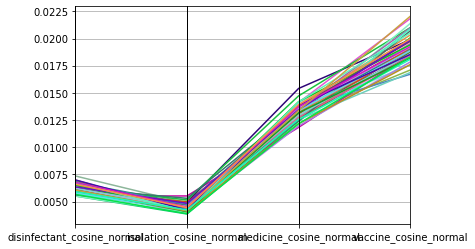

In [175]:
# pd.tools.plotting.parallel_coordinates(
#     df[['mpg', 'displacement', 'cylinders', 'horsepower', 'weight', 'acceleration']],
#     'mpg')
data = pd.read_csv('./state_topic_score_df.csv')
#, index_col='state'

plot = pd.plotting.parallel_coordinates(data, 'state')
plot.legend_.remove()
plt.show()


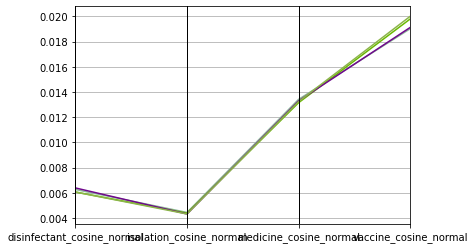

In [177]:
data = pd.read_csv('./region_topic_score_df.csv')

plot = pd.plotting.parallel_coordinates(data, 'region')
plot.legend_.remove()
plt.show()


## extras

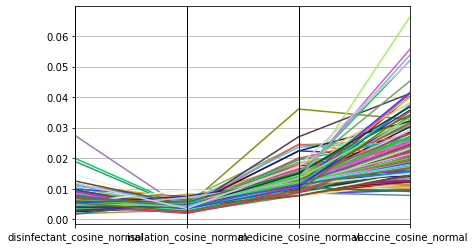

In [181]:
day_topic_score_df.to_csv('./day_topic_score.csv')
data = pd.read_csv('./day_topic_score.csv')

plot = pd.plotting.parallel_coordinates(data, 'day')
plot.legend_.remove()
plt.show()


<AxesSubplot:xlabel='day'>

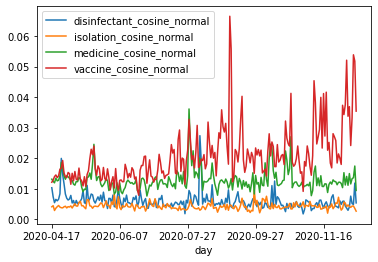

In [182]:
data.plot(x='day')

## Q11

In [132]:
from sklearn.decomposition import PCA
#from matplotlib import pyplot as plt
import seaborn as sb
from sklearn import preprocessing


<AxesSubplot:>

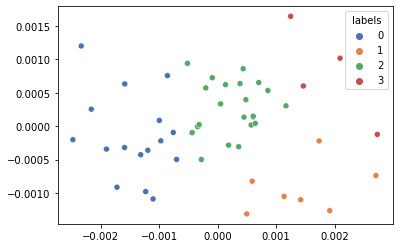

In [135]:
data_pca = PCA(n_components=2).fit_transform(data)
pca_dim1 = [row[0] for row in data_pca]
pca_dim2 = [row[1] for row in data_pca]

sb.scatterplot(data=data_kmeans, x=pca_dim1, y=pca_dim2,
               hue='labels', palette="deep")


<AxesSubplot:>

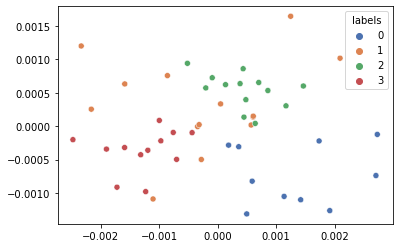

In [136]:
data_pca = PCA(n_components=2).fit_transform(data)
pca_dim1 = [row[0] for row in data_pca]
pca_dim2 = [row[1] for row in data_pca]

sb.scatterplot(data=data_spectral, x=pca_dim1, y=pca_dim2,
               hue='labels', palette="deep")


NOTE


In [ ]:
#start Timer
start_time = time.time()

elapsed_time = time.time() - start_time
elapsed_time
